In [1]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
data = pd.read_csv("titanic_dataset.csv")
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print("\nColumn Data Types:")
data.dtypes


Column Data Types:


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
print("\nMissing Values in Each Column:")
data.isnull().sum()


Missing Values in Each Column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

print("\nSummary Statistics for Categorical Columns:")
print(data.describe(include='object'))


Summary Statistics for Numerical Columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary Statistics for Categorical Co

In [5]:
# Shape of the dataset
print("\nShape of the Dataset (Rows, Columns):", data.shape)

# Count unique values in each column
print("\nUnique Values per Column:")
print(data.nunique())


Shape of the Dataset (Rows, Columns): (891, 12)

Unique Values per Column:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


In [6]:
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])
missing_info = data.isnull().sum() / len(data) * 100

for column in data.columns:
    if missing_info[column] < 10:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data.dropna(subset=[column], inplace=True)
 
print(f"\nMissing values after processing:\n{data.isnull().sum()}")


Missing values after processing:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_3812\4131905106.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3812\4131905106.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [7]:
import numpy as np

X = data.drop(columns=['Survived']).values
y = data['Survived'].values

def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (500, 6)
Shape of X_test: (214, 6)
Shape of y_train: (500,)
Shape of y_test: (214,)


In [8]:
import numpy as np

def euclidean_distance(point1, point2):
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

In [9]:
import numpy as np

# Function for KNN prediction for a single query
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# Function to test KNN for all test samples
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

In [10]:
import numpy as np

# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Perform prediction on the entire test set
try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)
    
    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)
    
    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 62.62%


In [11]:
def scale_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_scaled = (X - mean) / std
    return X_scaled

X_test_scaled = scale_data(X_test)
X_train_scaled = scale_data(X_train)
predictions = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)
print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

Accuracy of the KNN model on the test set: 66.36%


Accuracy for k=1 (Original Data): 62.15%
Oringal Time: : 1.2922422885894775
Accuracy for k=1 (Scaled Data): 61.68%
Scaled Time: : 1.2688212394714355
Accuracy for k=2 (Original Data): 63.55%
Oringal Time: : 1.231339454650879
Accuracy for k=2 (Scaled Data): 64.02%
Scaled Time: : 1.1262388229370117
Accuracy for k=3 (Original Data): 62.62%
Oringal Time: : 1.1673569679260254
Accuracy for k=3 (Scaled Data): 66.36%
Scaled Time: : 1.1410157680511475
Accuracy for k=4 (Original Data): 62.15%
Oringal Time: : 1.1563138961791992
Accuracy for k=4 (Scaled Data): 69.16%
Scaled Time: : 1.1411223411560059
Accuracy for k=5 (Original Data): 58.41%
Oringal Time: : 1.1695785522460938
Accuracy for k=5 (Scaled Data): 66.82%
Scaled Time: : 1.134568691253662
Accuracy for k=6 (Original Data): 61.68%
Oringal Time: : 1.132854700088501
Accuracy for k=6 (Scaled Data): 69.63%
Scaled Time: : 1.144491195678711
Accuracy for k=7 (Original Data): 61.21%
Oringal Time: : 1.1702113151550293
Accuracy for k=7 (Scaled Data): 66

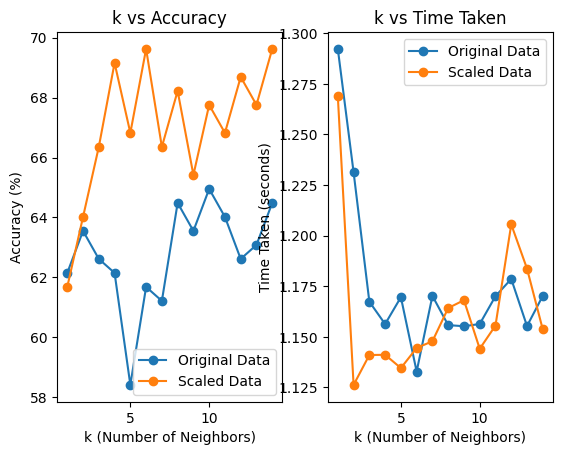

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time
# Function to test KNN on different values of k and plot the accuracies
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    original_accuracies = []
    scaled_accuracies = []
    original_times = []
    scaled_times = []

    for k in k_values:
        start_time = time.time()
        predictions_original = knn_predict(X_test, X_train, y_train, k)
        original_time = time.time() - start_time
        original_accuracy = compute_accuracy(y_test, predictions_original)

        X_train_scaled = scale_data(X_train)
        X_test_scaled = scale_data(X_test)
        start_time = time.time()
        predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k)
        scaled_time = time.time() - start_time
        scaled_accuracy = compute_accuracy(y_test, predictions_scaled)

        original_accuracies.append(original_accuracy)
        scaled_accuracies.append(scaled_accuracy)
        original_times.append(original_time)
        scaled_times.append(scaled_time)
        
        print(f"Accuracy for k={k} (Original Data): {original_accuracy:.2f}%")
        print(f"Oringal Time: : {original_time}")
        print(f"Accuracy for k={k} (Scaled Data): {scaled_accuracy:.2f}%")
        print(f"Scaled Time: : {scaled_time}")

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(k_values, original_accuracies, label='Original Data', marker='o')
    plt.plot(k_values, scaled_accuracies, label='Scaled Data', marker='o')
    plt.title('k vs Accuracy')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    # Time Plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, original_times, label='Original Data', marker='o')
    plt.plot(k_values, scaled_times, label='Scaled Data', marker='o')
    plt.title('k vs Time Taken')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Time Taken (seconds)')
    plt.legend()

    return original_accuracies, scaled_accuracies

# Define the range of k values to experiment with
k_values = range(1, 15)  # You can adjust this range as needed

# Run the experiment
try:
    original_accuracies, scaled_accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")